#### Amazon Web Scraping : Best Selling Games


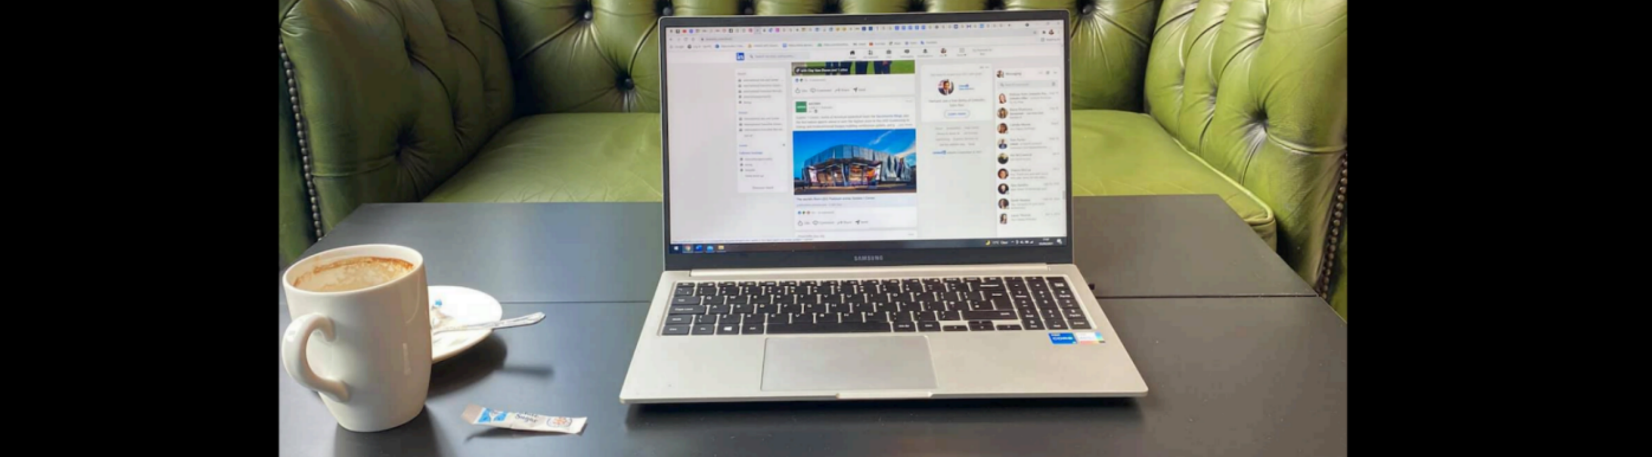

#### HEMANT THAPA

#### Web Scraping Amazon Gaming Data

In this analysis, I have played with Python along with the BeautifulSoup library to perform web scraping on Amazon, extracting valuable data related to gaming products. The goal was to gather information on product titles, prices, ratings, total ratings, and sales figures for various gaming items available on the platform.

Utilising web scraping techniques, I accessed and extracted pertinent details from Amazon's gaming section, enabling a comprehensive understanding of the gaming products landscape. Python served as the primary programming language for scripting the web scraping process, while BeautifulSoup facilitated the parsing of HTML content, making it efficient to extract the desired data.

The focus of this analysis is to identify the best-selling gaming products on Amazon based on their sales figures. By collecting and analyzing key metrics such as product ratings, total ratings, and sales data, we aim to highlight the top-performing games and provide insights into their popularity among Amazon users.

This exploration showcases the potential of web scraping and data analysis in extracting meaningful information from e-commerce platforms like Amazon, offering valuable insights into consumer preferences and product performance in the gaming industry.


In [1]:
import pandas as pd
import re
import smtplib
import numpy as np
import requests, time, datetime
import matplotlib.pyplot as plt

In [2]:
from bs4 import BeautifulSoup

In [3]:
url = "https://www.amazon.co.uk/s?k=play+station+games&crid=1M27DJCDI95SW&sprefix=play+station+games%2Caps%2C148&ref=nb_sb_noss_2"

In [4]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36",
    "Accept-Encoding": "gzip, deflate",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
    "DNT": "1",
    "Connection": "close",
    "Upgrade-Insecure-Requests": "1",
    "Referer": "https://www.amazon.co.uk/"
}

- User-Agent:

This header provides information about the user agent (browser) making the request. In this case, it's set to mimic a user using Google Chrome on Windows 10.

- Accept-Encoding:

This header indicates the types of encoding the client (your script in this case) can understand. Here, it specifies that the client can handle gzip and deflate compression.

- Accept:

This header specifies the types of content that the client can understand. It's saying that it can handle HTML, XHTML, XML, and other media types.

- DNT (Do Not Track):

This header is used to express the user's preference regarding tracking. Setting it to "1" indicates that the user does not want to be tracked.

- Connection:

This header controls whether the network connection should be kept open after the transaction is completed. Setting it to "close" indicates that the connection should be closed.

- Upgrade-Insecure-Requests:

This header is used to request a secure version of a page (using HTTPS) if the page is available. Setting it to "1" indicates that the client prefers a secure connection.

In [5]:
response = requests.get(url, headers=headers)

In [6]:
#check if the request was successful (status code 200)
response.status_code 

200

- Check if the request was successful (status code 200)

In [7]:
#byte formate and we want to convert into html formate
type(response.content)

bytes

In [8]:
page1 = BeautifulSoup(response.content, "html.parser")

In [9]:
#extracted anchor tags
link = page1.find_all("a", attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

In [10]:
link[0:2]

[<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/sspa/click?ie=UTF8&amp;spc=MTozMDk3OTYwOTA0NTIzNjkxOjE3MDA2OTkwNjM6c3BfYXRmOjMwMDA5MDE4NTU2MjYzMjo6MDo6&amp;url=%2FFarming-Simulator-22-Premium-PS4%2Fdp%2FB0C9QKFW3X%2Fref%3Dsr_1_1_sspa%3Fcrid%3D1M27DJCDI95SW%26keywords%3Dplay%2Bstation%2Bgames%26qid%3D1700699063%26sprefix%3Dplay%2Bstation%2Bgames%252Caps%252C148%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1"><span class="a-size-medium a-color-base a-text-normal">Farming Simulator 22 Premium Edition - PS4</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/SPORTS-Standard-PS4-VideoGame-English/dp/B0CB6TQVX5/ref=sr_1_2?crid=1M27DJCDI95SW&amp;keywords=play+station+games&amp;qid=1700699063&amp;sprefix=play+station+games%2Caps%2C148&amp;sr=8-2"><span class="a-size-medium a-color-base a-text-normal">EA SPORTS FC 24 Standard Edition PS4 | VideoGame | English</span> </a>

In [11]:
first_link_href = link[0].get('href')

In [12]:
product_list = "https://www.amazon.co.uk/" + first_link_href 

In [13]:
product_list

'https://www.amazon.co.uk//sspa/click?ie=UTF8&spc=MTozMDk3OTYwOTA0NTIzNjkxOjE3MDA2OTkwNjM6c3BfYXRmOjMwMDA5MDE4NTU2MjYzMjo6MDo6&url=%2FFarming-Simulator-22-Premium-PS4%2Fdp%2FB0C9QKFW3X%2Fref%3Dsr_1_1_sspa%3Fcrid%3D1M27DJCDI95SW%26keywords%3Dplay%2Bstation%2Bgames%26qid%3D1700699063%26sprefix%3Dplay%2Bstation%2Bgames%252Caps%252C148%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1'

In [14]:
product_page_response = requests.get(product_list, headers=headers)

In [15]:
product_page_response.connection

In [16]:
product_page_response.status_code

200

In [17]:
page2 = BeautifulSoup(product_page_response.content, "html.parser")

#### Product Title

In [18]:
#extracted anchor tags
product_title = page2.find("span", attrs={"id":'productTitle'}).text.strip()

In [19]:
product_title

'Farming Simulator 22 Premium Edition - PS4'

#### Price

In [20]:
#extracted anchor tags
product_price = page2.find("span", attrs={'class':'a-offscreen'}).text.strip()

In [21]:
product_price

'£44.99'

In [ ]:
# product_rating = page2.find("span", attrs={'class':'a-icon-alt'}).text.strip()
# product_rating

#### Total Customer Rating

In [23]:
#extracted anchor tags
total_rating_element = page2.find("span", attrs={"id": 'acrCustomerReviewText'})
total_rating_element

#### Total Sales

In [24]:
total_sales = page2.find("span", attrs={"class":'a-size-small social-proofing-faceout-title-text'}).text.strip()
total_sales

'50+ bought in past month'

#### Creating function to get multiple product details. 

In [25]:
def get_product_data(product_url, headers):
    product_page_response = requests.get(product_url, headers=headers)

    if product_page_response.status_code == 200:
        page2 = BeautifulSoup(product_page_response.content, "html.parser")

        #extracting anchor tags
        product_title = page2.find("span", attrs={"id": 'productTitle'}).text.strip()
        product_price = page2.find("span", attrs={'class': 'a-offscreen'}).text.strip()
        product_rating = page2.find("span", attrs={'class': 'a-icon-alt'}).text.strip()

        try:
            total_rating = page2.find("span", attrs={"id": 'acrCustomerReviewText'}).text.strip()
        except AttributeError:
            total_rating = ""

        #if the element is found before accessing its text attribute
        total_sales_element = page2.find("span", attrs={"class": 'a-size-small social-proofing-faceout-title-text'})
        total_sales = total_sales_element.text.strip() if total_sales_element else ""

        return {
            "Product Title": product_title,
            "Product Price": product_price,
            "Product Rating": product_rating,
            "Total Rating": total_rating,
            "Total Sales": total_sales
        }
    else:
        return None

In [26]:
url = "https://www.amazon.co.uk/s?k=play+station+games&crid=YOZXERZZA7TD&sprefix=play+station+games%2Caps%2C176&ref=nb_sb_noss_2"

In [27]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36",
    "Accept-Encoding": "gzip, deflate",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
    "DNT": "1",
    "Connection": "close",
    "Upgrade-Insecure-Requests": "1",
    "Referer": "https://www.amazon.co.uk/"
}

In [28]:
response = requests.get(url, headers=headers)

In [29]:
if response.status_code == 200:
    page1 = BeautifulSoup(response.content, "html.parser")
    links = page1.find_all("a", attrs={'class': 'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

    data_list = []

    for link in links:
        product_url = "https://www.amazon.co.uk/" + link.get('href')
        product_data = get_product_data(product_url, headers)

        if product_data:
            data_list.append(product_data)
        else:
            print(f"Failed to retrieve product data for {product_url}")

    #list of dictionaries to a pandas DataFrame
    df = pd.DataFrame(data_list)

else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

In [30]:
df = df.drop_duplicates()
df

,Product Title,Product Price,Product Rating,Total Rating,Total Sales
0,Farming Simulator 22 Premium Edition - PS4,£44.99,Previous page,,50+ bought in past month
1,EA SPORTS FC 24 Standard Edition PS4 | VideoGa...,£49.99,4.6 out of 5 stars,250 ratings,8K+ bought in past month
2,Assassin's Creed Mirage Launch Edition (Exclus...,£34.99,4.2 out of 5 stars,371 ratings,5K+ bought in past month
3,Forspoken (PlayStation 5),£19.95,4.2 out of 5 stars,221 ratings,2K+ bought in past month
4,STAR WARS: Tales from the Galaxy’s Edge - Enha...,£39.99,4.3 out of 5 stars,34 ratings,100+ bought in past month
5,Grand Theft Auto: The Trilogy - The Definitive...,£14.95,4.5 out of 5 stars,"1,903 ratings",800+ bought in past month
6,"Flying Ball, Hover Boomerang Orb Ball Flying S...",£23.49,4.0 out of 5 stars,"1,124 ratings",2K+ bought in past month
7,ADZ Universal Game Storage Tower – Stores 36 G...,£23.86,4.6 out of 5 stars,436 ratings,50+ bought in past month
8,Capcom Resident Evil 4 Remake (PS5),£26.99,4.8 out of 5 stars,748 ratings,3K+ bought in past month
9,Stray (PS5),£17.95,4.7 out of 5 stars,835 ratings,1K+ bought in past month


In [31]:
top_5_expensive_games = df.sort_values(by="Product Price", ascending=False)
top_5_expensive_games = top_5_expensive_games.head(5)
top_5_expensive_games

,Product Title,Product Price,Product Rating,Total Rating,Total Sales
1,EA SPORTS FC 24 Standard Edition PS4 | VideoGa...,£49.99,4.6 out of 5 stars,250 ratings,8K+ bought in past month
0,Farming Simulator 22 Premium Edition - PS4,£44.99,Previous page,,50+ bought in past month
4,STAR WARS: Tales from the Galaxy’s Edge - Enha...,£39.99,4.3 out of 5 stars,34 ratings,100+ bought in past month
19,Minecraft Legends - Deluxe Edition - PS4,£38.96,4.8 out of 5 stars,14 ratings,700+ bought in past month
2,Assassin's Creed Mirage Launch Edition (Exclus...,£34.99,4.2 out of 5 stars,371 ratings,5K+ bought in past month


In [32]:
df['Total Rating'] = df['Total Rating'].str.extract('(\d+)').fillna(-1).astype(int)

In [33]:
df[:5]

,Product Title,Product Price,Product Rating,Total Rating,Total Sales
0,Farming Simulator 22 Premium Edition - PS4,£44.99,Previous page,-1,50+ bought in past month
1,EA SPORTS FC 24 Standard Edition PS4 | VideoGa...,£49.99,4.6 out of 5 stars,250,8K+ bought in past month
2,Assassin's Creed Mirage Launch Edition (Exclus...,£34.99,4.2 out of 5 stars,371,5K+ bought in past month
3,Forspoken (PlayStation 5),£19.95,4.2 out of 5 stars,221,2K+ bought in past month
4,STAR WARS: Tales from the Galaxy’s Edge - Enha...,£39.99,4.3 out of 5 stars,34,100+ bought in past month


In [34]:
df['Shortened Title'] = df['Product Title'].apply(lambda x: ' '.join(x.split()[:3]))
df[:5]

,Product Title,Product Price,Product Rating,Total Rating,Total Sales,Shortened Title
0,Farming Simulator 22 Premium Edition - PS4,£44.99,Previous page,-1,50+ bought in past month,Farming Simulator 22
1,EA SPORTS FC 24 Standard Edition PS4 | VideoGa...,£49.99,4.6 out of 5 stars,250,8K+ bought in past month,EA SPORTS FC
2,Assassin's Creed Mirage Launch Edition (Exclus...,£34.99,4.2 out of 5 stars,371,5K+ bought in past month,Assassin's Creed Mirage
3,Forspoken (PlayStation 5),£19.95,4.2 out of 5 stars,221,2K+ bought in past month,Forspoken (PlayStation 5)
4,STAR WARS: Tales from the Galaxy’s Edge - Enha...,£39.99,4.3 out of 5 stars,34,100+ bought in past month,STAR WARS: Tales


In [35]:
df = df.sort_values(by='Product Price', ascending=True)

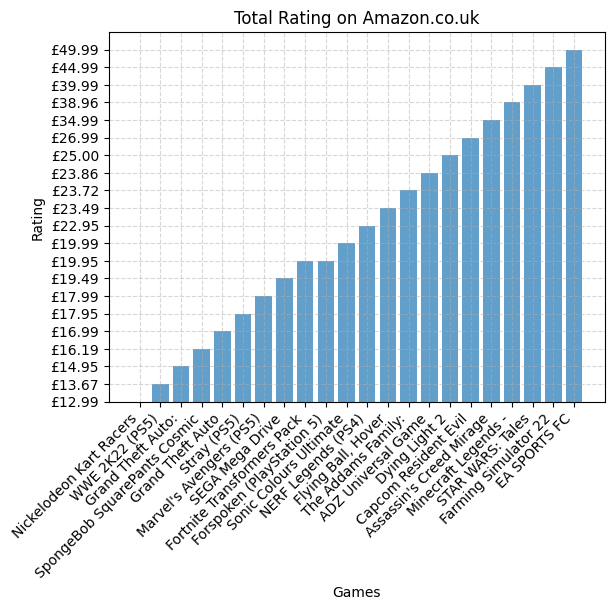

In [36]:
plt.bar(df['Shortened Title'], df['Product Price'], alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.grid(True, ls='--', alpha=0.5)
plt.title('Total Rating on Amazon.co.uk')
plt.ylabel('Rating')
plt.xlabel('Games')
plt.show()

1. **EA SPORTS FC 24 Standard Edition PS4**
   - Price: £49.99

2. **Farming Simulator 22 Premium Edition**
   - Price: £44.99

3. **STAR WARS: Tales from the Galaxy’s Edge**
   - Price: £39.99

In [37]:
df_top_total_customer_rating = df.sort_values(by='Total Rating', ascending = False)
df_top_total_customer_rating.head(5)

,Product Title,Product Price,Product Rating,Total Rating,Total Sales,Shortened Title
9,Stray (PS5),£17.95,4.7 out of 5 stars,835,1K+ bought in past month,Stray (PS5)
17,WWE 2K22 (PS5),£13.67,4.4 out of 5 stars,828,50+ bought in past month,WWE 2K22 (PS5)
8,Capcom Resident Evil 4 Remake (PS5),£26.99,4.8 out of 5 stars,748,3K+ bought in past month,Capcom Resident Evil
11,Sonic Colours Ultimate with Baby Sonic Keychai...,£19.99,4.5 out of 5 stars,491,300+ bought in past month,Sonic Colours Ultimate
18,Nickelodeon Kart Racers 2: Grand Prix (PS4),£12.99,4.5 out of 5 stars,486,200+ bought in past month,Nickelodeon Kart Racers


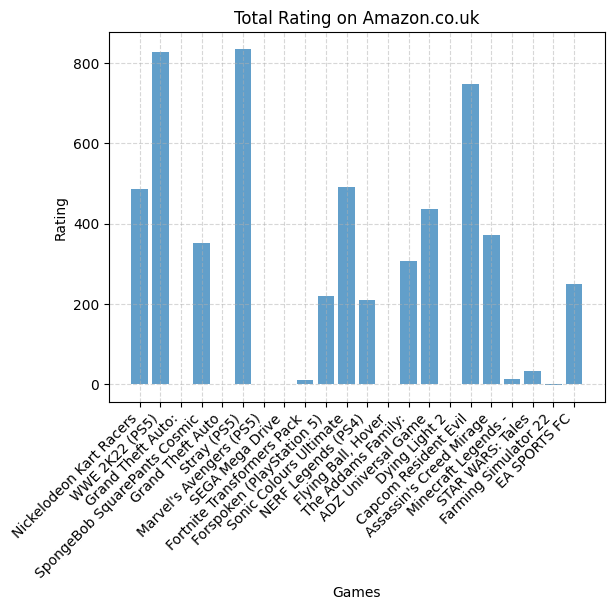

In [38]:
plt.bar(df['Shortened Title'], df['Total Rating'], alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.grid(True, ls='--', alpha=0.5)
plt.title('Total Rating on Amazon.co.uk')
plt.ylabel('Rating')
plt.xlabel('Games')
plt.show()

- Highest Rated Game:

The game with the highest rating is "Capcom Resident Evil 4 Remake (PS5)" with a rating of 4.8 out of 5 stars.

- Most Sold Game:

"Capcom Resident Evil 4 Remake (PS5)" also has the highest number of total sales with 3K+ bought in the past month, indicating its popularity among buyers.

- Popular Titles in the Past Month:

"Stray (PS5)" and "Capcom Resident Evil 4 Remake (PS5)" are both highly popular, each with over 1K+ and 3K+ purchases in the past month, respectively.

- Diverse Range of Games:

The list includes a variety of game genres, from action-adventure (Stray, Capcom Resident Evil 4 Remake) to sports entertainment (WWE 2K22) and kart racing (Nickelodeon Kart Racers 2).

- Moderate Price Range:

The prices of the games range from £12.99 to £26.99, indicating a moderate price range for these popular titles.

- Balanced Ratings:

All games have relatively high ratings (between 4.4 and 4.8 out of 5 stars), suggesting a general satisfaction among buyers.

- Marketing Impact:

"Sonic Colours Ultimate with Baby Sonic Keychain" has a relatively lower total sales number, but it might have a strong marketing appeal as indicated by the inclusion of a keychain with the game.

- Diverse Audience:

The varied number of sales for each game (ranging from 200+ to 3K+) suggests a diverse audience with different preferences for game titles.

In [39]:
def convert_to_numeric(value):
    try:
        if not value:
            return None
        #regular expression to remove non-numeric characters
        cleaned_value = re.sub(r'[^0-9K+]', '', value)
        #'K' to 1000
        cleaned_value = cleaned_value.replace('K', '000')
        #'+' to an empty string
        cleaned_value = cleaned_value.replace('+', '')
        #result to an integer
        return int(cleaned_value)
    except (TypeError, ValueError):
        #0 in case of an exception or missing value
        return 0 if pd.isna(value) or value == '' else None

In [40]:
df['Sales'] = df['Total Sales'].apply(convert_to_numeric)

In [41]:
df = df.sort_values(by='Sales' , ascending=False)
df.head(5)

,Product Title,Product Price,Product Rating,Total Rating,Total Sales,Shortened Title,Sales
1,EA SPORTS FC 24 Standard Edition PS4 | VideoGa...,£49.99,4.6 out of 5 stars,250,8K+ bought in past month,EA SPORTS FC,8000.0
2,Assassin's Creed Mirage Launch Edition (Exclus...,£34.99,4.2 out of 5 stars,371,5K+ bought in past month,Assassin's Creed Mirage,5000.0
16,Grand Theft Auto V (PS5),£16.99,4.7 out of 5 stars,1,4K+ bought in past month,Grand Theft Auto,4000.0
8,Capcom Resident Evil 4 Remake (PS5),£26.99,4.8 out of 5 stars,748,3K+ bought in past month,Capcom Resident Evil,3000.0
6,"Flying Ball, Hover Boomerang Orb Ball Flying S...",£23.49,4.0 out of 5 stars,1,2K+ bought in past month,"Flying Ball, Hover",2000.0


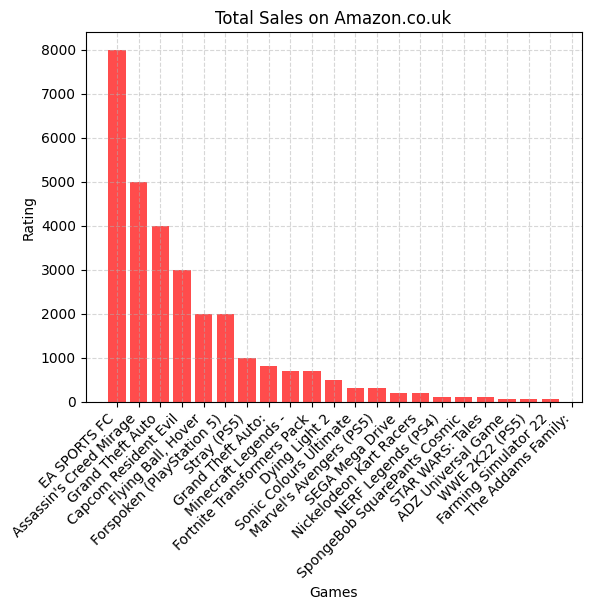

In [42]:
plt.bar(df['Shortened Title'], df['Sales'], color='red', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.grid(True, ls='--', alpha=0.5)
plt.title('Total Sales on Amazon.co.uk')
plt.ylabel('Rating')
plt.xlabel('Games')
plt.show()

#### Sales Data Short Analysis

1. **EA SPORTS FC 24 Standard Edition PS4:**
   - **Price:** £49.99
   - **Rating:** 4.6
   - **Sales:** 8,000+
   - *Popular soccer game with high ratings and substantial sales.*

2. **Assassin's Creed Mirage Launch Edition (Exclusive):**
   - **Price:** £34.99
   - **Rating:** 4.2
   - **Sales:** 5,000+
   - *Exclusive edition of Assassin's Creed with solid sales.*

3. **Grand Theft Auto V (PS5):**
   - **Price:** £16.99
   - **Rating:** 4.7
   - **Sales:** 4,000+
   - *Strong sales for the popular Grand Theft Auto V on PS5.*

4. **Capcom Resident Evil 4 Remake (PS5):**
   - **Price:** £26.99
   - **Rating:** 4.8
   - **Sales:** 3,000+
   - *Remake of Resident Evil 4 with high ratings and good sales.*

5. **Flying Ball, Hover Boomerang Orb Ball Flying Saucer:**
   - **Price:** £23.49
   - **Rating:** 4.0
   - **Sales:** 2,000+
   - *Unique flying saucer toy with moderate sales and ratings.*


In [43]:
df['Overall Product Rating'] = df['Product Rating'].apply(lambda x: re.search(r'^\d+\.\d+', x).group() if (x and re.search(r'^\d+\.\d+', x)) else None)

In [44]:
df[:5]

,Product Title,Product Price,Product Rating,Total Rating,Total Sales,Shortened Title,Sales,Overall Product Rating
1,EA SPORTS FC 24 Standard Edition PS4 | VideoGa...,£49.99,4.6 out of 5 stars,250,8K+ bought in past month,EA SPORTS FC,8000.0,4.6
2,Assassin's Creed Mirage Launch Edition (Exclus...,£34.99,4.2 out of 5 stars,371,5K+ bought in past month,Assassin's Creed Mirage,5000.0,4.2
16,Grand Theft Auto V (PS5),£16.99,4.7 out of 5 stars,1,4K+ bought in past month,Grand Theft Auto,4000.0,4.7
8,Capcom Resident Evil 4 Remake (PS5),£26.99,4.8 out of 5 stars,748,3K+ bought in past month,Capcom Resident Evil,3000.0,4.8
6,"Flying Ball, Hover Boomerang Orb Ball Flying S...",£23.49,4.0 out of 5 stars,1,2K+ bought in past month,"Flying Ball, Hover",2000.0,4.0


In [45]:
df = df.sort_values(by = 'Overall Product Rating', ascending=False)
df.head(5)

,Product Title,Product Price,Product Rating,Total Rating,Total Sales,Shortened Title,Sales,Overall Product Rating
21,Fortnite Transformers Pack (Game Download Code...,£19.95,4.9 out of 5 stars,11,700+ bought in past month,Fortnite Transformers Pack,700.0,4.9
8,Capcom Resident Evil 4 Remake (PS5),£26.99,4.8 out of 5 stars,748,3K+ bought in past month,Capcom Resident Evil,3000.0,4.8
19,Minecraft Legends - Deluxe Edition - PS4,£38.96,4.8 out of 5 stars,14,700+ bought in past month,Minecraft Legends -,700.0,4.8
16,Grand Theft Auto V (PS5),£16.99,4.7 out of 5 stars,1,4K+ bought in past month,Grand Theft Auto,4000.0,4.7
9,Stray (PS5),£17.95,4.7 out of 5 stars,835,1K+ bought in past month,Stray (PS5),1000.0,4.7


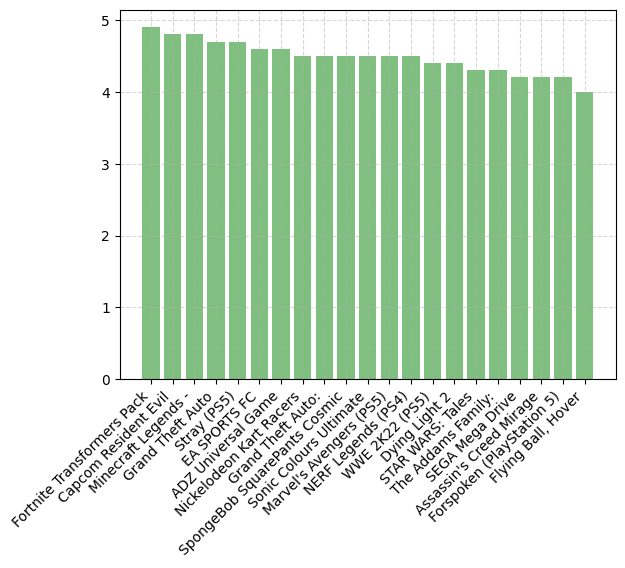

In [46]:
filtered_df = df.dropna(subset=['Shortened Title', 'Overall Product Rating'])
plt.bar(filtered_df['Shortened Title'], 
        filtered_df['Overall Product Rating'].astype(float), color='green', alpha=0.5)
plt.xticks(rotation=45, ha="right")
plt.grid(True, ls='--', alpha=0.5)
plt.show()

### References

1. [Beautiful Soup Documentation](https://pypi.org/project/beautifulsoup4/)
2. [Python Web Scraping: A Practical Introduction](https://realpython.com/python-web-scraping-practical-introduction/)
3. [Edureka - Online Learning Platform](https://www.edureka.co/search?utm_source=Admitad&utm_medium=Admitad+Affiliate&utm_campaign=Affiliate_881071_iR7nShqp-ZbSdcmsn-1ilt7d2&admitad_uid=af35bacea4bc0249fa67a02331fda150)
